In [1]:
import numpy as np
from solver_funcs import F_operator, mu_from_params
import matplotlib.pyplot as plt
from utils import noise_addition_image

In [2]:
## Define global variables

sigma = 1e-5

param_lims_dict = {
    0:(0.4,1.2),1:(2.38,2.52),2:(2.3,3.1),3:(-0.04,0.04), 4:(-0.08,0.08), 5:(2.68,2.82), 6:(-0.08,0.08), 7:(2.68,2.82), 8:(1,5), 9:(-0.2,0.2),
    10:(0.01,0.11),11:(-0.11,-0.01), 12:(0.5,0.7),13:(0,0.2),14:(0.45,1.15),15:(8,16),16:(0,2),17:(0.2,0.4),18:(0.2,0.4),19:(0.04,0.16),20:(0.55,0.95),21:(0.55,0.95),
    22:(13,17),23:(13,17),24:(0.06,0.1),25:(0.06,0.1),26:(0,146200),27:(0,250000),28:(0,19600),29:(0,19600),30:(0,19600),31:(0,250000), 32:(-np.pi/12, np.pi/12)
    }

prior_params = {
    0:(73100,46900),1:(125000,50000),2:(9800,3340),3:(9800,3340),4:(9800,3340),5:(125000,50000)
}

step_stdev = np.zeros(33)

for i in range(33):
    step_stdev[i] = (param_lims_dict[i][1] - param_lims_dict[i][0])

In [3]:
def calc_step(factor):
    return np.random.normal(scale=step_stdev)*factor

def check_inside_prior(param_list, param_lims):
    for i in range(len(param_list)):
        if param_list[i] < param_lims[i][0] or param_list[i] > param_lims[i][1]:
            return False
    return True

def calc_logprob_prior(param_list, prior_params):
    logprob = 0
    for i in range(len(prior_params)):
        logprob += -0.5*(param_list[26+i]-prior_params[i][0])**2/prior_params[i][1]**2
    return logprob

def calc_loglikelihood(param_list, meas_y, sigma):
    y_cur = F_operator(param_list)
    loglikelihood = - 0.5 * np.sum(np.power(meas_y-y_cur,2)) / sigma**2
    return loglikelihood

def calc_logpostprob(param_list, meas_y):
    return calc_loglikelihood(param_list, meas_y, sigma) + calc_logprob_prior(param_list, prior_params)

def sample_mean_params(param_lims):
    params_list = []
    for i in range(len(param_lims)):
        params_list.append((param_lims[i][1]-param_lims[i][0])/2 + param_lims[i][0]) 
    return np.array(params_list)


## DEFINE TARGET MEASUREMENT

In [4]:
mu_params = sample_mean_params(param_lims_dict)
mu_params[26:32] = mu_params[26:32]*0.2
mu = mu_from_params(mu_params)
y = F_operator(mu_params)
meas_y = noise_addition_image(y, noise_level=sigma)

/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  (self.LC_y_3 - self.LC_y_2) / (self.LC_x_3 - self.LC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:170: RuntimeWarning: divide by zero encountered in double_scalars
  (self.LC_y_4 - self.LC_y_1) / (self.LC_x_4 - self.LC_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  (self.SCTL_y_3 - self.SCTL_y_2) / (self.SCTL_x_3 - self.SCTL_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:360: RuntimeWarning: divide by zero encountered in double_scalars
  (self.SCTR_y_4 - self.SCTR_y_1) / (self.SCTR_x_4 - self.SCTR_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:484: R

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.549e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.031e-18 (tol = 1.000e-10) r (rel) = 2.602e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


In [6]:
mu.shape

(1, 64, 64, 1)

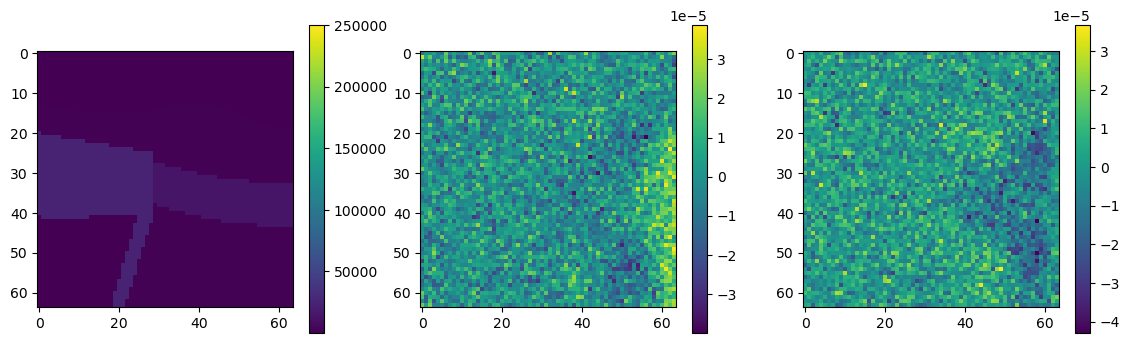

In [7]:
fig, ax = plt.subplots(1,3, figsize=(14,4))

cb=ax[0].imshow(mu[0,:,:,0], vmax=250000)
plt.colorbar(cb, ax=ax[0])
cb=ax[1].imshow(meas_y[0,:,:,0])
plt.colorbar(cb, ax=ax[1])
cb=ax[2].imshow(meas_y[0,:,:,1])
plt.colorbar(cb, ax=ax[2])

## SAMPLING ALGORITHM

In [157]:
mu1 = mu_from_params(mu_params)
delta = np.zeros(33)
delta[32] += np.pi/360
mu2 = mu_from_params(mu_params+delta)

/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  (self.LC_y_3 - self.LC_y_2) / (self.LC_x_3 - self.LC_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:170: RuntimeWarning: divide by zero encountered in double_scalars
  (self.LC_y_4 - self.LC_y_1) / (self.LC_x_4 - self.LC_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  (self.SCTL_y_3 - self.SCTL_y_2) / (self.SCTL_x_3 - self.SCTL_x_2),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:360: RuntimeWarning: divide by zero encountered in double_scalars
  (self.SCTR_y_4 - self.SCTR_y_1) / (self.SCTR_x_4 - self.SCTR_x_1),
/Users/javiermurgoitioesandi/Desktop/WIP/ONH_InverseElast/ONHFenics_library/mu_funcs_given.py:484: R

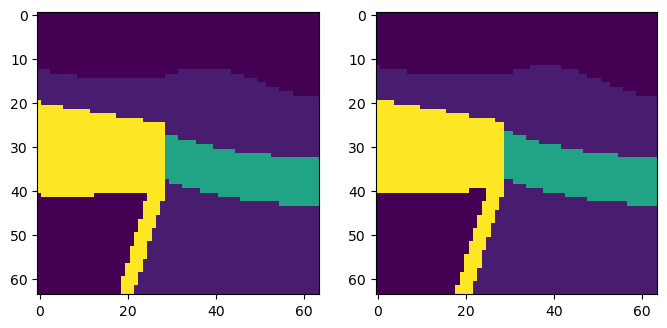

In [158]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(mu1[0,:,:,0])
ax[1].imshow(mu2[0,:,:,0])
plt.show()

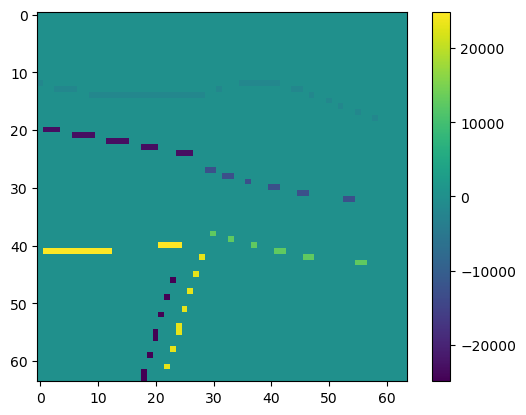

In [159]:
cb = plt.imshow(mu1[0,:,:,0]-mu2[0,:,:,0])
plt.colorbar()

In [160]:
y1 = F_operator(mu_params)
y2 = F_operator(mu_params+delta)

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.549e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.031e-18 (tol = 1.000e-10) r (rel) = 2.602e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.549e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.447e-18 (tol = 1.000e-10) r (rel) = 2.871e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


In [161]:
np.exp(0.5*np.sum(np.square(y1-meas_y))/sigma**2-0.5*np.sum(np.square(y2-meas_y))/sigma**2)

0.06637429425689345

In [5]:
chain1 = []
n_steps=4000
mu_cur = np.load("muparamssamples_1em5_0dot2mean_1725_2235.npy")[-1]
#mu_cur = mu_params
p_cur = calc_logpostprob(mu_cur, meas_y)
n_accepted = 0
for i in range(n_steps):
    mu_prop = mu_cur + calc_step(0.002)
    p_prop = calc_logpostprob(mu_prop, meas_y)
    print("")
    print(f"p_cur: {p_cur}")
    print(f"p_prop: {p_prop}")
    print(np.exp(p_prop-p_cur))
    u_mh = np.random.uniform()
    if np.exp(p_prop-p_cur) > u_mh and check_inside_prior(mu_prop, param_lims_dict):
        mu_cur = mu_prop
        p_cur = p_prop
        n_accepted += 1
    chain1.append(mu_cur)
    print(f"iteration {i}: samples accepted {n_accepted}, {100*n_accepted/(i+1)}")
    print("")
    

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.567e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.111e-18 (tol = 1.000e-10) r (rel) = 2.624e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.569e-03 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.874e-18 (tol = 1.000e-10) r (rel) = 2.470e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.

p_cur: -4091.76937655318
p_prop: -4090.7373421902744
2.8067700193526104
iteration 0: samples accepted 1, 100.0

No Jacobian form specified fo

KeyboardInterrupt: 

In [164]:
chain1[0].shape

(33,)

In [199]:
len(chain1)

510

In [200]:
muparamssamples=np.concatenate(chain1).reshape(510,33)

In [201]:
muparamssamples.shape

(510, 33)

In [202]:
np.save('muparamssamples_1em5_0dot2mean_1725_2235.npy', muparamssamples)

In [177]:
musamples = np.load('muparamssamples_1em5_0dot2mean.npy')

In [179]:
musamples.shape

(1725, 33)

In [188]:
mus = []
for i in range(700,1725):
    mus.append(mu_from_params(chain1[i]))

In [189]:
mus1 = np.concatenate(mus, axis=0)
print(mus1.shape)

(1025, 64, 64, 1)


In [190]:
mus = np.concatenate([mus1,np.load('posteriorsamples_1em5_0dot2mean_0_400.npy'),np.load('posteriorsamples_1em5_0dot2mean_400_700.npy')], axis=0)

In [192]:
np.save('posteriorsamples_1em5_0dot2mean_0_1725.npy', mus)

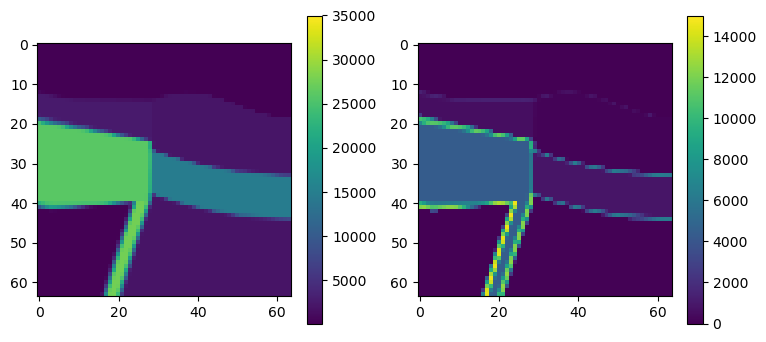

In [194]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

cb=ax[0].imshow(np.mean(mus[:,:,:,0], axis=0), vmax=35000)
plt.colorbar(cb, ax=ax[0])
cb=ax[1].imshow(np.std(mus[:,:,:,0], axis=0), vmax=15000)
plt.colorbar(cb, ax=ax[1])

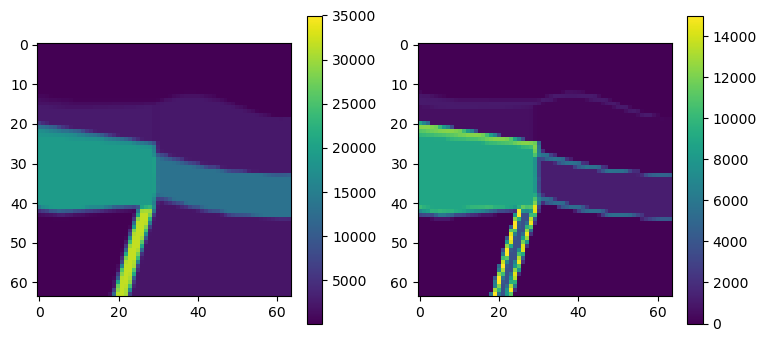

In [139]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

cb=ax[0].imshow(np.mean(mus1[:,:,:,0], axis=0), vmax=35000)
plt.colorbar(cb, ax=ax[0])
cb=ax[1].imshow(np.std(mus1[:,:,:,0], axis=0), vmax=15000)
plt.colorbar(cb, ax=ax[1])